In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator

In [12]:
image=ImageDataGenerator(validation_split=.1)

In [13]:
train=image.flow_from_directory("cat_dog",target_size=(200,200),class_mode='categorical',batch_size=20,subset='training')

Found 22500 images belonging to 2 classes.


In [14]:
testing=image.flow_from_directory("cat_dog",target_size=(200,200),class_mode='categorical',batch_size=15,subset='validation')

Found 2500 images belonging to 2 classes.


In [15]:
print(train.class_indices)

{'cats': 0, 'dogs': 1}


In [16]:
cnn=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3)),
    MaxPooling2D((2,2)),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(300,activation='relu'), #2 deep layers 
    Dense(100,activation='relu'),
    Dense(2,activation='sigmoid') 
])

In [17]:
cnn.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [14]:
cnn.fit(train,epochs=2)

Epoch 1/2
1125/1125 [==============================] - 788s 700ms/step - loss: 5.5059 - accuracy: 0.5601
Epoch 2/2
1125/1125 [==============================] - 782s 695ms/step - loss: 0.6341 - accuracy: 0.6384


In [15]:
cnn.evaluate(testing)

167/167 [==============================] - 21s 125ms/step - loss: 0.7037 - accuracy: 0.5684


[0.7037252187728882, 0.5684000253677368]

In [2]:
import cv2
import numpy as np


In [3]:
getimage=cv2.imread("dog.jpeg")
new_array=cv2.resize(getimage,(200,200))
test_image=np.array(new_array).reshape(-1,200,200,3)     

In [60]:
output=cnn.predict(test_image)

1/1 [==============================] - 0s 32ms/step


In [61]:
output

array([[0.39602727, 0.6364218 ]], dtype=float32)

In [62]:
y_image=[np.argmax(output)]

if(y_image[0]==0):
    print("cat")
else:
    print("dog")


list

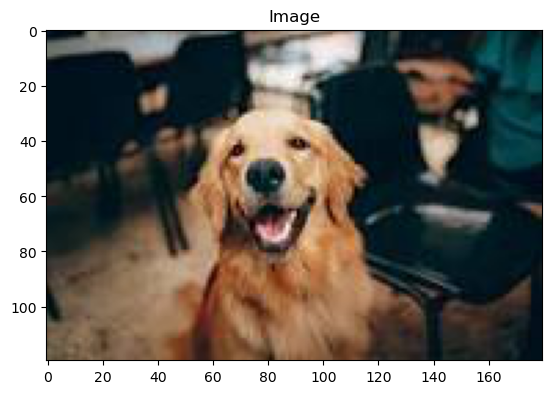

In [6]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Image")
 
image = mpimg.imread("dog.jpeg")
plt.imshow(image)
plt.show()